In [1]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# create list of all directories
base_dir = '/kaggle/input/alaska2-image-steganalysis/'
image_dirs = ['Cover','JUNIWARD', 'JMiPOD',  'UERD']

In [3]:
data = {}

for image_dir in image_dirs:
    if image_dir=="Test":
        continue
    images = []
    for file in os.listdir(os.path.join(base_dir, image_dir)):
        images.append(file)
    data[image_dir]=images

train_df = pd.DataFrame(data)

In [4]:
train_df.head()

,Cover,JUNIWARD,JMiPOD,UERD
0,67017.jpg,67017.jpg,67017.jpg,67017.jpg
1,59366.jpg,59366.jpg,59366.jpg,59366.jpg
2,47488.jpg,47488.jpg,47488.jpg,47488.jpg
3,21182.jpg,21182.jpg,21182.jpg,21182.jpg
4,74383.jpg,74383.jpg,74383.jpg,74383.jpg


**JUNIWARD JMiPOD** and **UERD** are steganography algorithms that are used to hide information in images

In [5]:
def similarity_test(df):
    similarity = set(df['Cover'] == df['JUNIWARD'])
    similarity = similarity | set(df['Cover'] ==df['JMiPOD'])
    similarity = similarity | set(df['Cover'] ==df['UERD'])
    return similarity


In [6]:
similarity_test(train_df)

{True}

In [7]:
train_df.describe()

,Cover,JUNIWARD,JMiPOD,UERD
count,75000,75000,75000,75000
unique,75000,75000,75000,75000
top,57719.jpg,57719.jpg,57719.jpg,57719.jpg
freq,1,1,1,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Cover     75000 non-null  object
 1   JUNIWARD  75000 non-null  object
 2   JMiPOD    75000 non-null  object
 3   UERD      75000 non-null  object
dtypes: object(4)
memory usage: 2.3+ MB


In [9]:
image_id_1 = 41731
image_id_2 = 12314
image_id_3 = 28962
image_id_4 = 127
sample_images_1 = [base_dir + x[0] +'/'+x[1] for x in zip(list(train_df.columns) , list(train_df.iloc[image_id_1,:]))]
sample_images_2 = [base_dir + x[0] +'/'+x[1] for x in zip(list(train_df.columns) , list(train_df.iloc[image_id_2,:]))]
sample_images_3 = [base_dir + x[0] +'/'+x[1] for x in zip(list(train_df.columns) , list(train_df.iloc[image_id_3,:]))]
sample_images_4 = [base_dir + x[0] +'/'+x[1] for x in zip(list(train_df.columns) , list(train_df.iloc[image_id_4,:]))]

sample_images_1

['/kaggle/input/alaska2-image-steganalysis/Cover/20205.jpg',
 '/kaggle/input/alaska2-image-steganalysis/JUNIWARD/20205.jpg',
 '/kaggle/input/alaska2-image-steganalysis/JMiPOD/20205.jpg',
 '/kaggle/input/alaska2-image-steganalysis/UERD/20205.jpg']

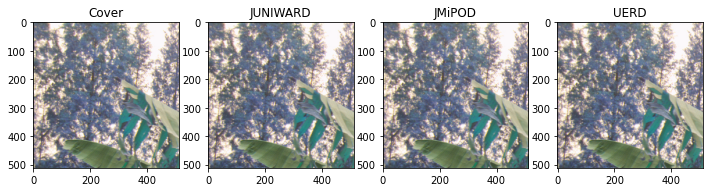

In [10]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
for img,ax in zip(sample_images_1,axs):
    ax.imshow(cv2.imread(img))
    ax.set_title(img.split('/')[-2])
plt.show()

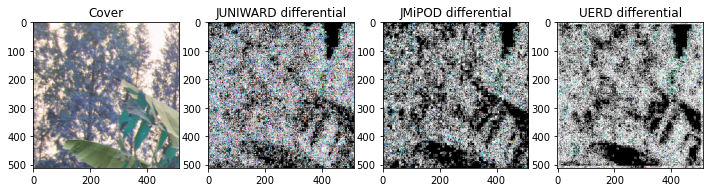

In [11]:
multiplier = 10000 # This is used to brighten the diffrential image

_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()

Cover = np.array(cv2.imread(sample_images_1[0]))
for img,ax in zip(sample_images_1, axs):
    if 'Cover' in img:
        ax.imshow(Cover)
        ax.set_title('Cover')
        continue
    image = np.array(cv2.imread(img))
    new_image = (Cover - image)*multiplier
    ax.imshow(new_image)
    title = img.split('/')[-2] + ' differential'
    ax.set_title(title)

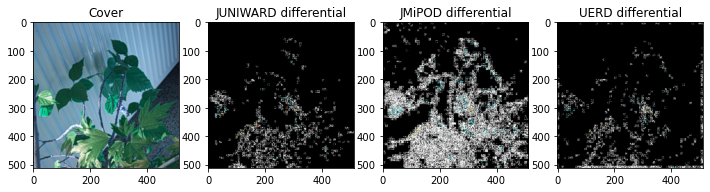

In [12]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()

Cover = np.array(cv2.imread(sample_images_2[0]))
for img,ax in zip(sample_images_2, axs):
    if 'Cover' in img:
        ax.imshow(Cover)
        ax.set_title('Cover')
        continue
    image = np.array(cv2.imread(img))
    new_image = (Cover - image)*multiplier
    ax.imshow(new_image)
    title = img.split('/')[-2] + ' differential'
    ax.set_title(title)

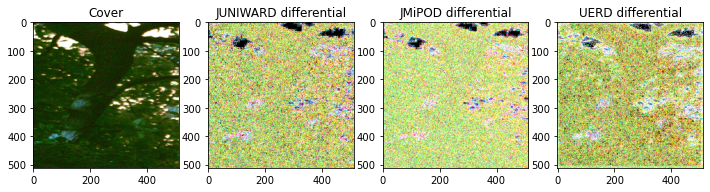

In [13]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()

Cover = np.array(cv2.imread(sample_images_3[0]))
for img,ax in zip(sample_images_3, axs):
    if 'Cover' in img:
        ax.imshow(Cover)
        ax.set_title('Cover')
        continue
    image = np.array(cv2.imread(img))
    new_image = (Cover - image)*multiplier
    ax.imshow(new_image)
    title = img.split('/')[-2] + ' differential'
    ax.set_title(title)

**Histogram of Oriented Gradient** is a feature descriptor that is used to extract features from image data. The HOG descriptor focuses on the structure or the shape of an object. The HOG feature descriptor counts the occurrences of gradient orientation in localized portions of an image.

In [14]:
from skimage.feature import hog

def hog_image(img):
    img=img[:,:,1] 
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(4, 4),cells_per_block=(2, 2), visualize=True)    
    return hog_image

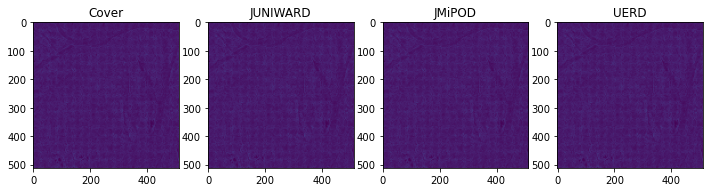

In [15]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()
for img,ax in zip(sample_images_4,axs):
    ax.imshow(hog_image(np.array(cv2.imread(img))))
    ax.set_title(img.split('/')[-2])
plt.show()

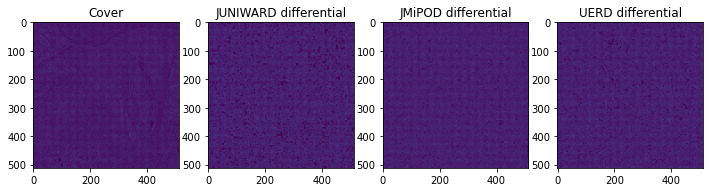

In [16]:
_, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()

Cover = np.array(cv2.imread(sample_images_4[0]))
for img,ax in zip(sample_images_4, axs):
    if 'Cover' in img:
        ax.imshow(hog_image(Cover))
        ax.set_title('Cover')
        continue
    image = np.array(cv2.imread(img))
    new_image = (Cover - image)
    ax.imshow(hog_image(new_image))
    title = img.split('/')[-2] + ' differential'
    ax.set_title(title)

From the above plots, we can see that these different steganography algorithms are used to change/hide certain features of the image.

Moreover, these hidden features could contain important information that could be leveraged.